**Dane Sabo**

*dane.sabo@pitt.edu*

*October 7th, 2024*


In [25]:
import numpy as np
import sympy as sm

def answer_print(question,string):
    print('\n=========FINAL ANSWER=========')
    print(question+':')
    print(string)
    print('=========FINAL ANSWER=========\n')

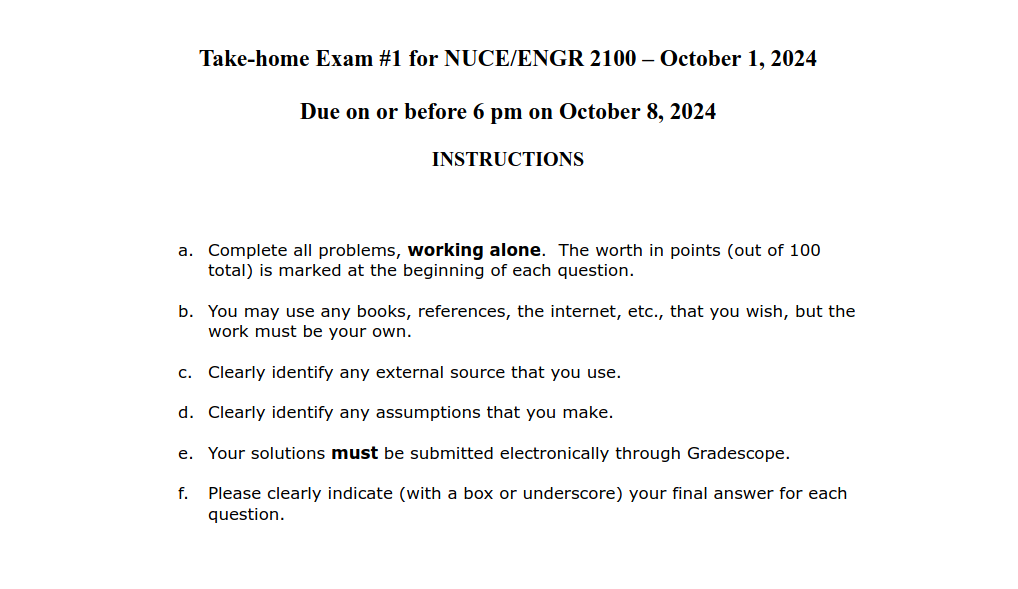

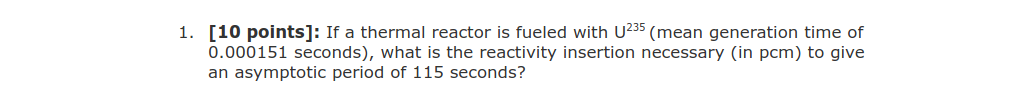

In [26]:
#Given information
l_star = 1.51e-4 #s
beta = np.array([0.00021, 0.00142, 0.00127, 0.00257, 0.00075, 0.00027]) #From 7.1 Slides
t_half = np.array([55, 23, 6.2, 2.3, 0.61, 0.23]) #From 7.1 Slides

#Find lambdas
lambduh = 0.693/t_half

#Find omega
omega = 1/115 #Hz

#Calculate Reactivity with Inhour Equation
rho = omega*l_star + np.sum(omega*beta/(omega+lambduh))
answer_print('Question 1',f"The reactivity insertion necessary is {rho:.6f} pcm.")


=========FINAL ANSWER=========
Question 1:
The reactivity insertion necessary is 0.000575 pcm.
=========FINAL ANSWER=========



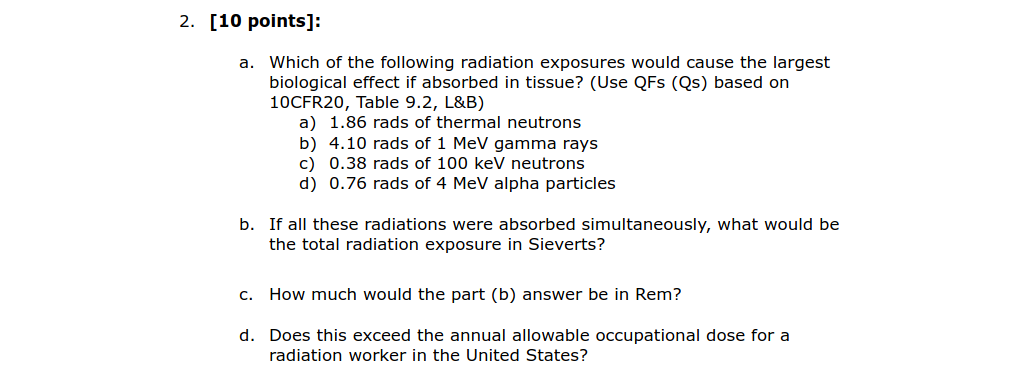

In [27]:
thermal_neutron_dose = 1.86 * 2 #rem 
gamma_ray_dose = 4.10 * 1 #rem
fast_neutron_dose = 0.38 * 7.5 #rem
alpha_particle_dose = 0.76 * 10 #rem

print(f'The thermal neutron equivalent dose is {thermal_neutron_dose:.3f} rem')
print(f'The gamma ray equivalent dose is {gamma_ray_dose:.3f} rem')
print(f'The fast neutron equivalent dose is {fast_neutron_dose:.3f} rem')
print(f'The alpha particle equivalent dose is {alpha_particle_dose:.3f} rem')

answer_print('Question 2a', 'The largest biological effect would be caused by the alpha particles.')

The thermal neutron equivalent dose is 3.720 rem
The gamma ray equivalent dose is 4.100 rem
The fast neutron equivalent dose is 2.850 rem
The alpha particle equivalent dose is 7.600 rem

=========FINAL ANSWER=========
Question 2a:
The largest biological effect would be caused by the alpha particles.
=========FINAL ANSWER=========



In [28]:
total_dose = thermal_neutron_dose + gamma_ray_dose + fast_neutron_dose + alpha_particle_dose

answer_print('Question 2b', f'The total dose is {total_dose/100:.3e} sieverts.')


=========FINAL ANSWER=========
Question 2b:
The total dose is 1.827e-01 sieverts.
=========FINAL ANSWER=========



In [29]:
answer_print('Question 2c', f'The total dose is {total_dose:.3e} rem.')


=========FINAL ANSWER=========
Question 2c:
The total dose is 1.827e+01 rem.
=========FINAL ANSWER=========



========FINAL ANSWER==========

Question 2d:

Yes, according to the NRC (https://www.nrc.gov/reading-rm/basic-ref/glossary/occupational-dose.html).
The maximum occupational dose per year is 5 rem. This dose would be over three times that allowable amount.

========FINAL ANSWER==========

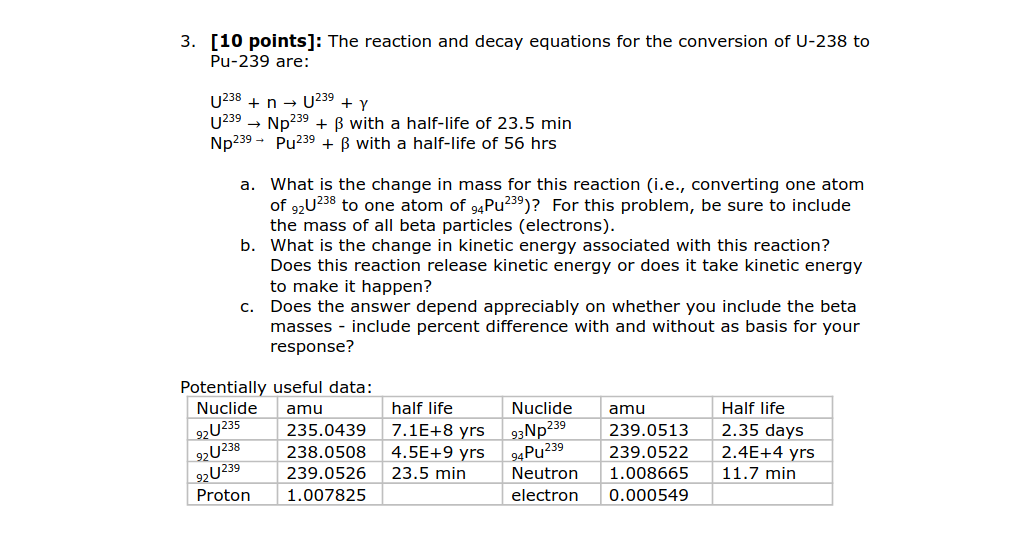

In [39]:
U238_mass = 238.0508 #amu
Pu239_mass = 239.0513 #amu
neutron_mass = 1.008665 #amu
electron_mass = 0.000549 #amu

# Part A
products = 1*Pu239_mass + 2*electron_mass
reactants = 1*U238_mass + 1*neutron_mass
change_in_mass = reactants - products

answer_print('Question 3a', f'{change_in_mass:.5e} amu')

# Part B
Q = change_in_mass * 931.5 #MeV
answer_print('Question 3b', f'The kinetic energy is {Q:.5e} MeV. \nThis reaction releases energy.')

# Part C
new_change_in_mass = reactants - 1*Pu239_mass #amu
new_Q = new_change_in_mass * 931.5 #MeV
percent_difference = (new_Q - Q)/Q *100

answer_print('Question 3c', f'The difference is significant. Without electrons, the result is {new_Q:.5e} MeV. \nThere is {percent_difference:.2f}% difference between the two answers.')



=========FINAL ANSWER=========
Question 3a:
7.06700e-03 amu
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 3b:
The kinetic energy is 6.58291e+00 MeV. 
This reaction releases energy.
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 3c:
The difference is significant. Without electrons, the result is 7.60570e+00 MeV. 
There is 15.54% difference between the two answers.
=========FINAL ANSWER=========



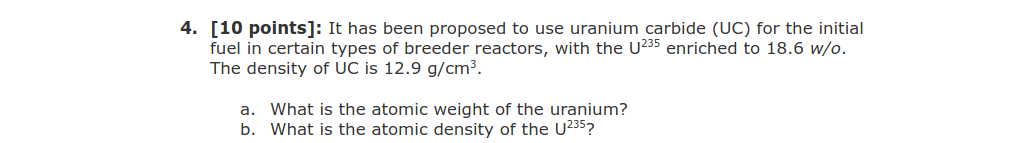

In [42]:
#Assuming other uranium isotopes in trace quantities...
U235_mass = 235.9439 #amu
enrichment = 18.6
UC_density =12.9 #g/cm^3

# Part A
A_U = 1/(1/100*(enrichment/U235_mass + (100-enrichment)/U238_mass))
answer_print('Question 4a', f'The atomic weight of the uranium is {A_U:.4f} amu.')

# Part B
C12_mass = 12 #amu

# Calculate molecule mass
A_UC = A_U + C12_mass

# Find weight percent U235
w_o_U235 = U235_mass/A_UC*100

# Find density of U235 component
U235_density = w_o_U235*UC_density/100

# Calculate atomic density
N_U235 = enrichment/100*U235_density*6.0221409e23/U235_mass

answer_print('Question 4b', f'The atomic density of U235 in UC is {N_U235:.4e} atoms/cm^3.')



=========FINAL ANSWER=========
Question 4a:
The atomic weight of the uranium is 237.6561 amu.
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 4b:
The atomic density of U235 in UC is 5.7878e+21 atoms/cm^3.
=========FINAL ANSWER=========



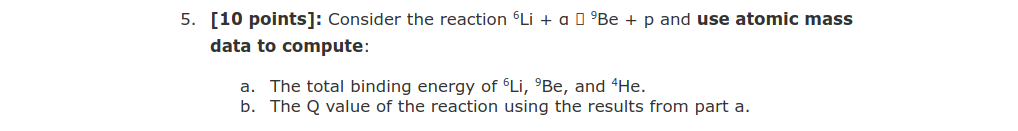

In [60]:
# Part A
def binding_energy(Z, N, Mass):
    H_mass = 1.007825032 #amu
    neutron_mass = 1.00866491578 #amu
    mass_defect = Z*H_mass + N*neutron_mass - Mass #amu
    binding_energy = mass_defect * 931.5 #MeV
    return binding_energy

Li6_mass = 6.015122 #amu
Be9_mass = 0.012183 #amu
He4_mass = 4.002603 #amu

answer_print('Question 5a',
             f'Lithium-6 Binding Energy: {binding_energy(3, 3, Li6_mass):.4e} MeV\n'+
             f'Beryllium-9 Binding Energy: {binding_energy(4, 5, Be9_mass):.4e}MeV\n'+
             f'Helium-4 Binding Energy: {binding_energy(2, 2, He4_mass):.4e}MeV')

# Part B
reactants = binding_energy(3, 3, Li6_mass) + binding_energy(2, 2, He4_mass)
products = binding_energy(4, 5, Be9_mass)
Q = products - reactants

answer_print('Question 5b', f'{Q:.4e} MeV')



=========FINAL ANSWER=========
Question 5a:
Lithium-6 Binding Energy: 3.1995e+01 MeV
Beryllium-9 Binding Energy: 8.4417e+03MeV
Helium-4 Binding Energy: 2.8296e+01MeV
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 5b:
8.3814e+03 MeV
=========FINAL ANSWER=========



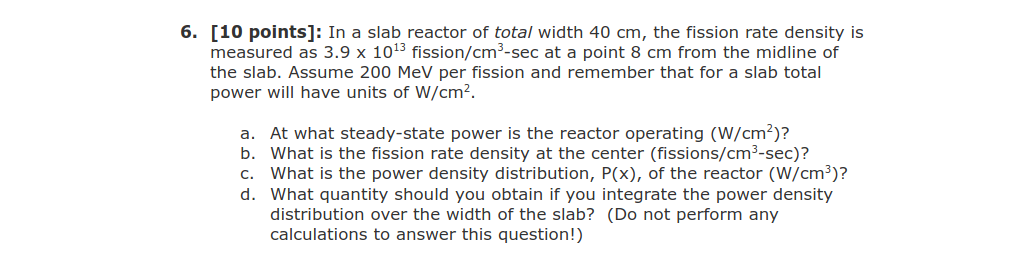

In [63]:
# Part A
F_dot = 3.9e13 #fission/cm^3/s
E_r = 200 * 1.60218e-13 #J
#According to INL: https://mooseframework.inl.gov/bison/theory/power_burnup.html
P_local = F_dot * E_r
answer_print('Question 6a', f'{P:4e} J')

# Part B



=========FINAL ANSWER=========
Question 6a:
1.249700e+03 J
=========FINAL ANSWER=========



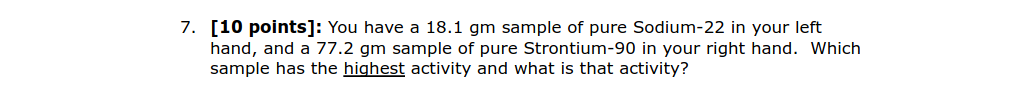

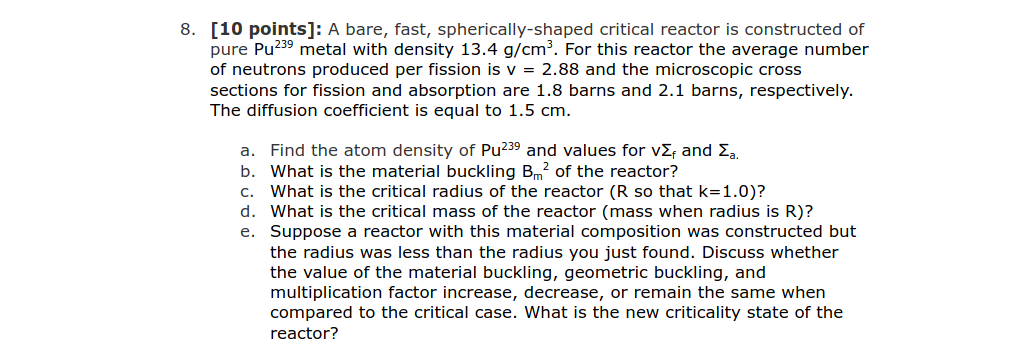

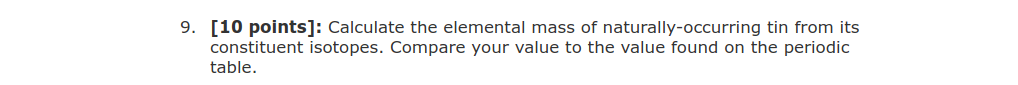

In [64]:
"""
I know wikipedia is not a fantastic source... but they have a convenient table listing isotopes of tin with their abundance.
https://en.wikipedia.org/wiki/Isotopes_of_tin
"""
tin_stats = np.array(
)



TypeError: array() missing required argument 'object' (pos 0)

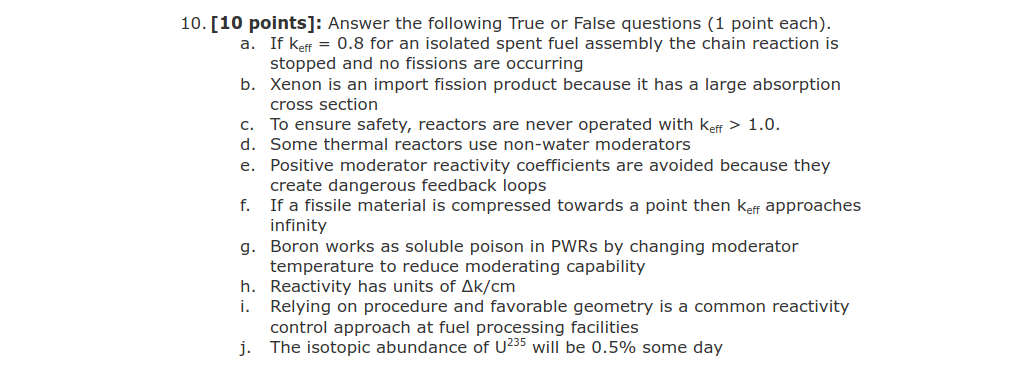